In [9]:
import keras # do stworzenia modelu
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

# pobranie danych do treningu i testowych
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalizacja danych
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [14]:
from keras.utils import to_categorical
# dane sa kategoriami a nie wartosciami
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
#zmien ksztalt na jednowymiarowy
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [32]:
from keras.layers import Dense
# stworz nasz model
model = keras.Sequential()
model.add(Dense(64, input_shape = (784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                650       
Total para

In [33]:
from keras.optimizers import Adamax
from keras.losses     import categorical_crossentropy

# kompilacja modelu

model.compile(optimizer= Adamax(lr=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [34]:
model.fit(x_train, y_train, epochs=10, batch_size=500)


Epoch 1/10
60000/60000 [==============================] - 2s 36us/step - loss: 1.2806 - acc: 0.5949
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.4207 - acc: 0.8737
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3161 - acc: 0.9054
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.2648 - acc: 0.9217
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2283 - acc: 0.9319
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1997 - acc: 0.9414
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1771 - acc: 0.9482
Epoch 8/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1612 - acc: 0.9525
Epoch 9/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1468 - acc: 0.9564
Epoch 10/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1363 - acc: 0.9592

In [35]:
validation_loss, validation_acc = model.evaluate(x_test, y_test)

print(validation_loss, validation_acc)

10000/10000 [==============================] - 1s 52us/step
0.1456358224913478 0.9555


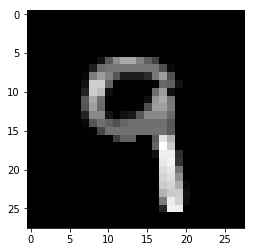

In [ ]:
import time
import pylab as pl
from IPython import display
indeks = 0

for i in range(1,9999):
    pred = model.predict([x_test[indeks:indeks+1]])
    pl.imshow(x_test[indeks:indeks+1].reshape(28,28), cmap='gray')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    print(pred.argmax())
    time.sleep(1.0)
    indeks += 1
